In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]

In [3]:
#定义logistic function
def Logistic(a):
    return 1/(1+np.e**(-a))

In [4]:
#读取数据集
x_train,y_train=get_data('a9a.txt')
x_test,y_test=get_data('a9a.t')

for i in range(y_test.shape[0]):
    if(y_test[i]<0):
        y_test[i]=0
for i in range(y_train.shape[0]):
    if (y_train[i] < 0):
        y_train[i] = 0
print(y_test,y_train)

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.txt')
_________________________________________________________get_data - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.t')
_________________________________________________________get_data - 0.0s, 0.0min
[ 0.  0.  1. ...,  0.  0.  1.] [ 0.  0.  0. ...,  0.  0.  1.]


In [5]:
#增加输入x矩阵一列全为1是的线性模型满足y=w*x

x_train=x_train.todense()
one=np.ones(x_train.shape[0])
x_train=np.column_stack((x_train,one))


x_test=x_test.todense()
zero=np.zeros(x_test.shape[0])
x_test=np.column_stack((x_test,zero))

one=np.ones(x_test.shape[0])
x_test=np.column_stack((x_test,one))

y_train=np.mat(y_train).T
y_test=np.mat(y_test).T
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(32561, 124) (16281, 124) (32561, 1) (16281, 1)


In [6]:
#参数随机初始化
w=np.random.random(size=(1,x_train.shape[1]))
w=np.mat(w)
w=w.T
print(w)

[[ 0.87431418]
 [ 0.72314594]
 [ 0.24090179]
 [ 0.38172346]
 [ 0.75609532]
 [ 0.19843747]
 [ 0.61823011]
 [ 0.00690112]
 [ 0.45031041]
 [ 0.96093208]
 [ 0.64792321]
 [ 0.09493405]
 [ 0.00312517]
 [ 0.14441077]
 [ 0.94315458]
 [ 0.83253805]
 [ 0.11851896]
 [ 0.90737437]
 [ 0.2437259 ]
 [ 0.07699251]
 [ 0.64725144]
 [ 0.7957423 ]
 [ 0.76222541]
 [ 0.85893225]
 [ 0.33292621]
 [ 0.13500113]
 [ 0.33069012]
 [ 0.98095139]
 [ 0.86563988]
 [ 0.19675862]
 [ 0.68927835]
 [ 0.56370526]
 [ 0.12150721]
 [ 0.37543259]
 [ 0.81653633]
 [ 0.9785287 ]
 [ 0.94999898]
 [ 0.41020221]
 [ 0.84101802]
 [ 0.66033181]
 [ 0.76440429]
 [ 0.21981765]
 [ 0.95364739]
 [ 0.50314795]
 [ 0.64105501]
 [ 0.27627751]
 [ 0.94399805]
 [ 0.51459082]
 [ 0.53592476]
 [ 0.4055621 ]
 [ 0.23208778]
 [ 0.25175326]
 [ 0.50237428]
 [ 0.09964045]
 [ 0.52858061]
 [ 0.94911032]
 [ 0.18112782]
 [ 0.53842281]
 [ 0.45024339]
 [ 0.85285202]
 [ 0.04790018]
 [ 0.26068674]
 [ 0.6913777 ]
 [ 0.47026862]
 [ 0.09732083]
 [ 0.5647926 ]
 [ 0.60518

In [7]:

#sgd
sgd_rate=0.01
sgd_w=w

#momentum
momentum_gamma=0.9
momentum_rate=0.01
momentum_v = 0
momentum_w=w

#NAG

nag_gamma=0.9
nag_rate=0.01
nag_v=0
nag_w=w

#adagrad
adagrad_rate=0.04
adagrad_G=0
adagrad_epsilon=np.e**-6
adagrad_w=w

#rmsprop
rmsprop_rate=0.01
rmsprop_G=0
rmsprop_epsilon=np.e**-6
rmsprop_gamma=0.9
rmsprop_w=w

#adadelta
adadelta_G=0
adadelta_epsilon=np.e**-6
adadelta_gamma=0.95
adadelta_t=0
adadelta_w=w

#adam
adam_rate=0.01
adam_G=0
adam_epsilon=np.e**-6
adam_gamma=0.999
adam_t=0
adam_m=0
adam_beta=0.9
adam_w=w


In [8]:
#循环次数
time=0

#画图存数据的列表
time_list=[]
sgd_L_list=[]
momentum_L_list=[]
nag_L_list=[]
adagrad_L_list=[]
rmsprop_L_list=[]
adadelta_L_list=[]
adam_L_list=[]

loss function：jw=-1/n*(从i到n相加(yi*log(1/e**(-w.T*xi))+(1-yi)*log(1-1/e**(-w.T*xi))))
梯度：grad_w=(1/e**(-w.T*x)-y)*x

In [10]:
while time<200:
    #初始化
    time=time+1
    time_list.append(time)
    sgd_Jgrad = 0
    momentum_Jgrad = 0
    adagrad_Jgrad = 0
    rmsprop_Jgrad = 0
    adadelta_Jgrad = 0
    adam_Jgrad = 0
    
    #随机取10个数据训练
    random_sample=random.sample(range(x_train.shape[0]),10)
    print("iterator:", time)

    #SGD
    for i in random_sample:
        sgd_Jgrad=sgd_Jgrad+((Logistic(np.array(x_train[i]*sgd_w)[0][0])-y_train[i])*x_train[i]).T
    sgd_Jgrad=sgd_Jgrad/10
    sgd_w=sgd_w-sgd_rate*sgd_Jgrad
    sgd_L = 0
    #计算分类准确率
    correct =0
    for i in range(x_test.shape[0]):
        sgd_L = sgd_L+np.array(y_test[i])[0][0]*np.log(Logistic(np.array(x_test[i]*sgd_w)[0][0]))+(1-y_test[i])*np.log(1-Logistic(np.array(x_test[i]*sgd_w)[0][0]))
        if(Logistic(np.array(x_test[i]*sgd_w)[0][0])>0.5 and y_test[i]==1):
            correct+=1
        elif(Logistic(np.array(x_test[i]*sgd_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    sgd_L=-sgd_L/x_test.shape[0]
    print("sgd_test_loss:", sgd_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    sgd_L_list.append(np.array(sgd_L)[0][0])
    
    #Momentum
    for i in random_sample:
        momentum_Jgrad=momentum_Jgrad+((Logistic(np.array(x_train[i]*momentum_w)[0][0])-y_train[i])*x_train[i]).T
    momentum_Jgrad=momentum_Jgrad/10
    momentum_v = momentum_gamma * momentum_v + momentum_rate * momentum_Jgrad
    momentum_w = momentum_w - momentum_v
    momentum_L = 0
    #计算分类准确率
    correct =0
    for i in range(x_test.shape[0]):
        momentum_L = momentum_L + np.array(y_test[i])[0][0] * np.log(Logistic(np.array(x_test[i] * momentum_w)[0][0])) + (1 - y_test[i]) * np.log(1 - Logistic(np.array(x_test[i] * momentum_w)[0][0]))
        if (Logistic(np.array(x_test[i] * momentum_w)[0][0]) > 0.5 and y_test[i] == 1):
            correct += 1
        elif(Logistic(np.array(x_test[i]*momentum_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    momentum_L = -momentum_L / x_test.shape[0]
    print("momentum_test_loss:", momentum_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    momentum_L_list.append(np.array(momentum_L)[0][0])

    #NAG
    nag_v = 0
    nag_Jgrad=0
    for i in random_sample:
        nag_Jgrad = nag_Jgrad + ((Logistic(np.array(x_train[i] * (nag_w - nag_gamma * nag_v))[0][0]) - y_train[i]) * x_train[i]).T
    nag_Jgrad = nag_Jgrad / 10
    nag_v = nag_gamma * nag_v + nag_rate * nag_Jgrad
    nag_w = nag_w - nag_v
    #计算分类准确率
    correct=0
    nag_L = 0
    for i in range(x_test.shape[0]):
        nag_L = nag_L + np.array(y_test[i])[0][0] * np.log(Logistic(np.array(x_test[i] * nag_w)[0][0])) + (1 - y_test[i]) * np.log(1 - Logistic(np.array(x_test[i] * nag_w)[0][0]))
        if (Logistic(np.array(x_test[i] * nag_w)[0][0]) > 0.5 and y_test[i] == 1):
            correct += 1
        elif(Logistic(np.array(x_test[i]*nag_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    nag_L = -nag_L / x_test.shape[0]
    print("nag_test_loss:", nag_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    nag_L_list.append(np.array(nag_L)[0][0])

    #Adagrad
    for i in random_sample:
        adagrad_Jgrad=adagrad_Jgrad+((Logistic(np.array(x_train[i]*adagrad_w)[0][0])-y_train[i])*x_train[i]).T
    adagrad_Jgrad=adagrad_Jgrad/10
    adagrad_G = adagrad_G + np.array(adagrad_Jgrad) * np.array(adagrad_Jgrad)
    adagrad_w = adagrad_w - (adagrad_rate / np.sqrt(adagrad_epsilon + adagrad_G)) * np.array(adagrad_Jgrad)
    adagrad_L = 0
    #计算分类准确率
    correct=0
    for i in range(x_test.shape[0]):
        adagrad_L = adagrad_L + np.array(y_test[i])[0][0] * np.log(Logistic(np.array(x_test[i] * adagrad_w)[0][0])) + (1 - y_test[i]) * np.log(1 - Logistic(np.array(x_test[i] * adagrad_w)[0][0]))
        if (Logistic(np.array(x_test[i] * adagrad_w)[0][0]) > 0.5 and y_test[i] == 1):
            correct += 1
        elif(Logistic(np.array(x_test[i]*adagrad_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    adagrad_L = -adagrad_L / x_test.shape[0]
    print("adagrad_test_loss:", adagrad_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adagrad_L_list.append(np.array(adagrad_L)[0][0])
    
    #rmsprop
    for i in random_sample:
        rmsprop_Jgrad=rmsprop_Jgrad+((Logistic(np.array(x_train[i]*rmsprop_w)[0][0])-y_train[i])*x_train[i]).T
    rmsprop_Jgrad=rmsprop_Jgrad/10
    rmsprop_G = rmsprop_gamma*rmsprop_G +(1-rmsprop_gamma)*np.array(rmsprop_Jgrad) * np.array(rmsprop_Jgrad)
    rmsprop_w = rmsprop_w - (rmsprop_rate / np.sqrt(rmsprop_epsilon + rmsprop_G)) * np.array(rmsprop_Jgrad)
    rmsprop_L = 0
    #计算分类准确率
    correct=0
    for i in range(x_test.shape[0]):
        rmsprop_L = rmsprop_L + np.array(y_test[i])[0][0] * np.log(Logistic(np.array(x_test[i] * rmsprop_w)[0][0])) + (1 - y_test[i]) * np.log(1 - Logistic(np.array(x_test[i] * rmsprop_w)[0][0]))
        if (Logistic(np.array(x_test[i] * rmsprop_w)[0][0]) > 0.5 and y_test[i] == 1):
            correct += 1
        elif(Logistic(np.array(x_test[i]*rmsprop_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    rmsprop_L = -rmsprop_L / x_test.shape[0]
    print("rmsprop_test_loss:",rmsprop_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    rmsprop_L_list.append(np.array(rmsprop_L)[0][0])

    #adadelta
    for i in random_sample:
        adadelta_Jgrad=adadelta_Jgrad+((Logistic(np.array(x_train[i]*adadelta_w)[0][0])-y_train[i])*x_train[i]).T
    adadelta_Jgrad=adadelta_Jgrad/10
    adadelta_G = adadelta_gamma * adadelta_G + (1 - adadelta_gamma) * np.array(adadelta_Jgrad) * np.array(adadelta_Jgrad)
    adadelta_delta_w=-np.sqrt(adadelta_t+adadelta_epsilon)/np.sqrt(adadelta_G+adadelta_epsilon) * np.array(adadelta_Jgrad)
    adadelta_w = adadelta_w + adadelta_delta_w
    adadelta_t=adadelta_gamma*adadelta_t+(1-adadelta_gamma)*np.array(adadelta_delta_w)*np.array(adadelta_delta_w)
    adadelta_L = 0
    #计算分类准确率
    correct=0
    for i in range(x_test.shape[0]):
        adadelta_L = adadelta_L + np.array(y_test[i])[0][0] * np.log(Logistic(np.array(x_test[i] * adadelta_w)[0][0])) + (1 - y_test[i]) * np.log(1 - Logistic(np.array(x_test[i] * adadelta_w)[0][0]))
        if (Logistic(np.array(x_test[i] * adadelta_w)[0][0]) > 0.5 and y_test[i] == 1):
            correct += 1
        elif(Logistic(np.array(x_test[i]*adadelta_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    adadelta_L = -adadelta_L / x_test.shape[0]
    print("adadelta_test_loss:", adadelta_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adadelta_L_list.append(np.array(adadelta_L)[0][0])

    #Adam
    for i in random_sample:
        adam_Jgrad=adam_Jgrad+((Logistic(np.array(x_train[i]*adam_w)[0][0])-y_train[i])*x_train[i]).T
    adam_Jgrad=adam_Jgrad/10
    adam_m=adam_beta*adam_m+(1-adam_beta)*adam_Jgrad
    adam_G = adam_gamma * adam_G + (1 - adam_gamma) * np.array(adam_Jgrad) * np.array(adam_Jgrad)
    adam_alpha=adam_rate*math.sqrt(1-math.pow(adam_gamma,time))/(1-math.pow(adam_beta,time))
    adam_w = adam_w - adam_alpha*adam_m/np.sqrt(adam_G+adam_epsilon)
    adam_L = 0
    #计算分类准确率
    correct=0
    for i in range(x_test.shape[0]):
        adam_L = adam_L + np.array(y_test[i])[0][0] * np.log(Logistic(np.array(x_test[i] * adam_w)[0][0])) + (1 - y_test[i]) * np.log(1 - Logistic(np.array(x_test[i] * adam_w)[0][0]))
        if (Logistic(np.array(x_test[i] * adam_w)[0][0]) > 0.5 and y_test[i] == 1):
            correct += 1
        elif(Logistic(np.array(x_test[i]*adam_w)[0][0])<=0.5 and y_test[i]==0):
            correct+=1
    adam_L = -adam_L / x_test.shape[0]
    print("adam_test_loss:", adam_L)
    print("correct rate:", float(correct) / float(x_test.shape[0]))
    adam_L_list.append(np.array(adam_L)[0][0])


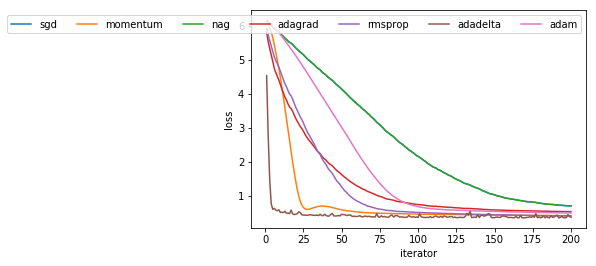

In [11]:
#画图
plt.xlabel('iterator')
plt.ylabel('loss')
line1=plt.plot(time_list,sgd_L_list)
line2=plt.plot(time_list,momentum_L_list)
line3=plt.plot(time_list,nag_L_list)
line4=plt.plot(time_list,adagrad_L_list)
line5=plt.plot(time_list,rmsprop_L_list)
line6=plt.plot(time_list,adadelta_L_list)
line7=plt.plot(time_list,adam_L_list)
label = ["sgd","momentum","nag","adagrad","rmsprop","adadelta","adam"]
plt.legend(label, loc = 0, ncol = 7)
plt.show()